In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score 
from matplotlib import pyplot as plt

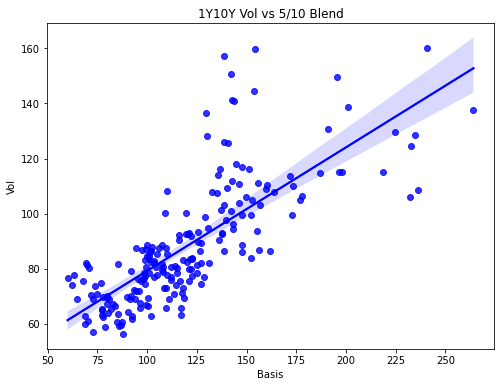

In [35]:
plt.figure(figsize=(8, 6))
plt.title("1Y10Y Vol vs 5/10 Blend")
sns.regplot(x=df3['Basis'], y=df3['Vol'], color='blue');

In [12]:
R_square = r2_score(df3.Basis, df3.Vol) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination -0.16420887067633716


In [68]:
# Lagging indicator (3 months)
df3['three_month_lag'] = df3.Vol.shift(3)

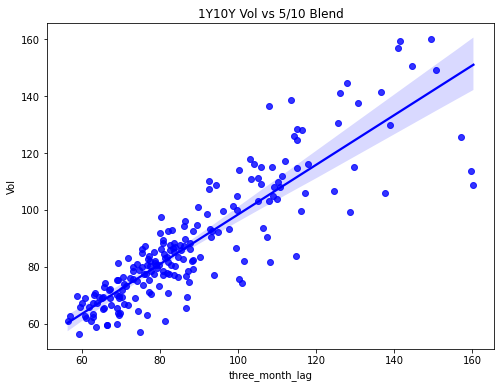

In [69]:
plt.figure(figsize=(8, 6))
plt.title("1Y10Y Vol vs 5/10 Blend")
sns.regplot(x=df3['three_month_lag'], y=df3['Vol'], color='blue');

In [15]:
R_square = r2_score(df3.three_month_lag[3:], df3.Vol[3:]) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.75278185624784


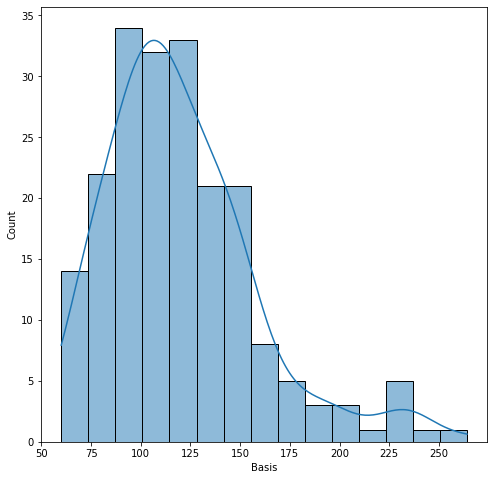

In [16]:
# KDE Plot of the 5/10 blend. Long term average is 120
plt.figure(figsize=(8, 8))
sns.histplot(df3['Basis'], kde=True);

In [33]:
# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(df2['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

new_df = df2.set_index(datetime_index)

# Dropping the extra date column
df3 = new_df.drop(columns=['Date'])

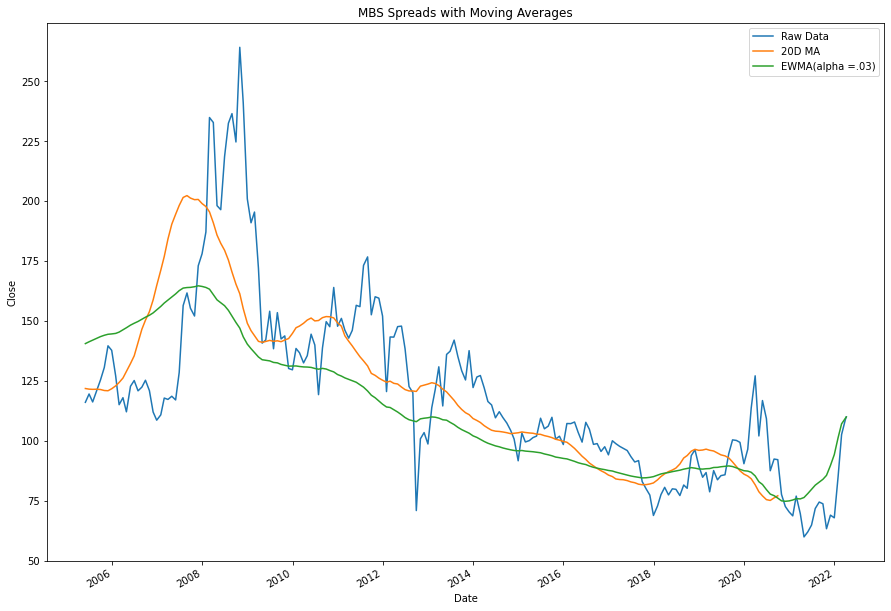

In [49]:
# Moving average chart for the spread

f, ax = plt.subplots(figsize=(15,11))
df3.Basis.plot(label='Raw Data', ax=ax)
df3.Basis.rolling(20).mean().plot(label='20D MA', ax=ax)
df3.Basis.ewm(alpha=0.03).mean().plot(label='EWMA(alpha =.03)', ax=ax)

plt.title('MBS Spreads' + " with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close")
plt.show()

In [43]:
"""
This is our feature matrix. Using .values returns an array. y is what we are trying to predict and X is what 
we believe predicts Y.
"""

X = df3[['Vol']].values

y = df3[['Basis']].values

X.shape, y.shape

((204, 1), (204, 1))

In [44]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# split up our data in to 20% testing, 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# sklearn.linear_model.LinearRegression documentation
lr = LinearRegression()

# train the algorithm
# the fit method documentation
lr.fit(X_train, y_train)

"""
Predicted values based off testing data. We are going to compare these predicted values to 
real world values and try to quantify the difference between our model and reality
"""
# predict method documentation
y_pred = lr.predict(X_test)

"""
A mean absolute error of 18 means our model was on average off by 18bp.
This is about what we'd expect from such a simple model.
"""
# mean_absolute_error documentation
mean_absolute_error(y_pred, y_test)

18.474563733047187

In [47]:
df3['predicted_2022'] = lr.predict(df3[['Basis']].values)

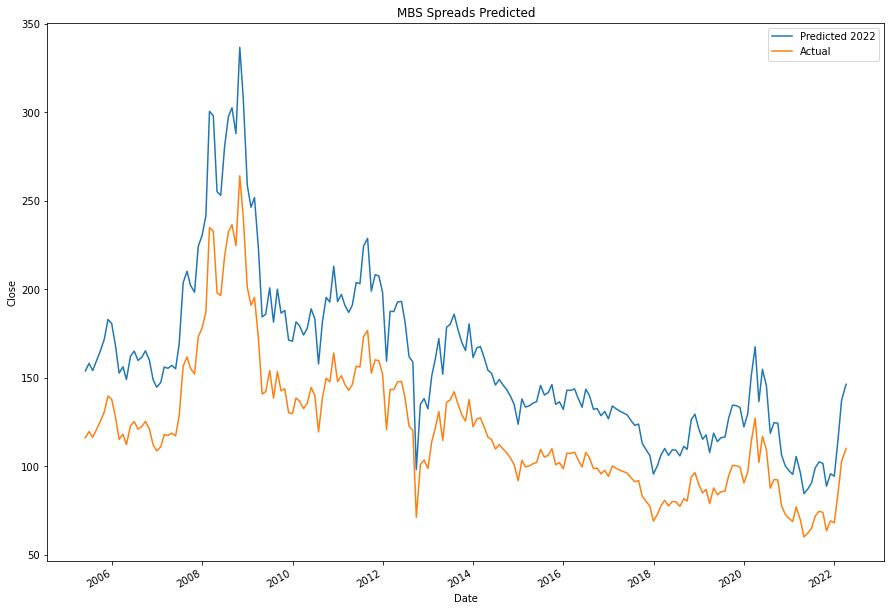

In [63]:
f, ax = plt.subplots(figsize=(15,11))
df3.predicted_2022.plot(label='Predicted 2022', ax=ax)
df3.Basis.plot(label='Actual', ax=ax)


plt.title('MBS Spreads' + " Predicted")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close")
plt.show()

In [60]:
#Removing column truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [84]:
df3

,Vol,Basis,three_month_lag,predicted_2022,Diff
2022-04-07,108.2470,110.0072,NaN,146.287746,36.280546
2022-03-31,100.2610,109.0120,NaN,145.057624,36.045624
2022-02-28,88.0700,102.6435,NaN,137.185806,34.542306
2022-01-31,81.7920,85.2134,108.2470,115.641239,30.427839
2021-12-31,75.5475,67.9444,100.2610,94.295801,26.351401
2021-11-30,81.9810,69.0620,88.0700,95.677216,26.615216
2021-10-29,77.6620,63.3924,81.7920,88.669277,25.276877
2021-09-30,73.7070,73.7977,75.5475,101.530803,27.733103
2021-08-31,70.7070,74.5275,81.9810,102.432876,27.905376
2021-07-30,70.4700,71.8370,77.6620,99.107269,27.270269
